# M.L prediction of Breast Cancer(Malignant or Benign)

Import modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import and read data

In [3]:
data=pd.read_csv('/storage/emulated/0/Android/data/ru.iiec.pydroid3/files/BreastCancer.csv')
print(data.head(n=5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Check for info from data

In [4]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

change diagnosis from object to integer by either creating a new column or mapping

In [5]:
data['diagnosis']= data['diagnosis'].map({'B':1,'M':0})
data.drop("id",axis=1,inplace=True)
data.drop("Unnamed: 32", axis=1,inplace=True)
print(data)


     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

There are 32 columns and 568 rows of data

# Note: There are 3 categories of columns...'mean' , 'standard error' and  'worst'.

Mean is the average sum... standard error(se) is the degree of deviation of samples from the population...worst is a choice modelling for selecting worst samples from population.
column 2:11=mean
column 12:21=se
column 22:32=worst

In [6]:
mean_columns=(data.columns[1:11])
se_columns=list(data.columns[12:21])
worst_columns=list(data.columns[22:32])
print(mean_columns,'__________\n',se_columns,'________\n',worst_columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object') __________
 ['texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'] ________
 ['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Exploratory Data Analysis(EDA)

In [7]:
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

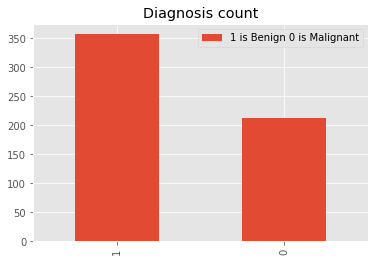

In [8]:
party_cnt = data['diagnosis'].value_counts()

plt.style.use('ggplot')
party_cnt.plot(kind ='bar',label='1 is Benign 0 is Malignant')
plt.title('Diagnosis count')
plt.legend()
plt.show()

To plot for other features,use the lineplot

Text(0.5, 1.0, 'COMPACTNESS MEAN')

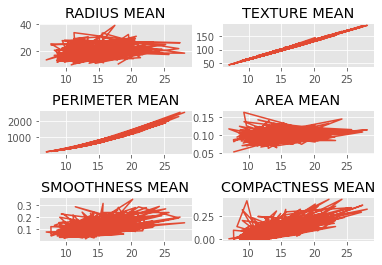

In [9]:
fig, ax= plt.subplots(3,2,gridspec_kw={'hspace': 1.0}) 
x=data['radius_mean'] 
y1=data['texture_mean']
y2=data['perimeter_mean']
y3=data['area_mean']
y4=data['smoothness_mean']
y5=data['compactness_mean']
y6=data['concavity_mean']
y7=data['concave points_mean']

ax[0,0].plot(x, y1)
ax[0,0].set_title('RADIUS MEAN')
ax[0,1].plot(x, y2)
ax[0,1].set_title('TEXTURE MEAN')
ax[1,0].plot(x, y3)
ax[1,0].set_title('PERIMETER MEAN') 
ax[1,1].plot(x, y4)
ax[1,1].set_title('AREA MEAN') 
ax[2,0].plot(x, y5)
ax[2,0].set_title('SMOOTHNESS MEAN') 
ax[2,1].plot(x, y6)
ax[2,1].set_title('COMPACTNESS MEAN')

#'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean'] __________
 #'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'] ________
 #'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Text(0.5, 1.0, 'PERIMETER SE')

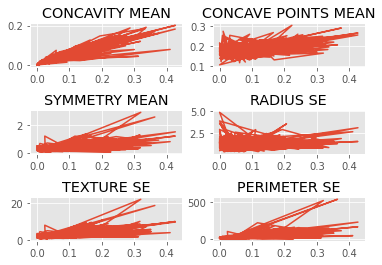

In [10]:
fig, ax= plt.subplots(3,2,gridspec_kw={'hspace': 1.0}) 
x=data['concavity_mean'] 
y1=data['concave points_mean']
y2=data['symmetry_mean']
y3=data['radius_se']
y4=data['texture_se']
y5=data['perimeter_se']
y6=data['area_se']
y7=data['smoothness_se']

ax[0,0].plot(x, y1)
ax[0,0].set_title('CONCAVITY MEAN')
ax[0,1].plot(x, y2)
ax[0,1].set_title('CONCAVE POINTS MEAN')
ax[1,0].plot(x, y3)
ax[1,0].set_title('SYMMETRY MEAN') 
ax[1,1].plot(x, y4)
ax[1,1].set_title('RADIUS SE') 
ax[2,0].plot(x, y5)
ax[2,0].set_title('TEXTURE SE') 
ax[2,1].plot(x, y6)
ax[2,1].set_title('PERIMETER SE')

#'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean'] __________
 #'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'] ________
 #'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [11]:
print(data[mean_columns].corr().round(2))

                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                    1.00          0.32            1.00       0.99   
texture_mean                   0.32          1.00            0.33       0.32   
perimeter_mean                 1.00          0.33            1.00       0.99   
area_mean                      0.99          0.32            0.99       1.00   
smoothness_mean                0.17         -0.02            0.21       0.18   
compactness_mean               0.51          0.24            0.56       0.50   
concavity_mean                 0.68          0.30            0.72       0.69   
concave points_mean            0.82          0.29            0.85       0.82   
symmetry_mean                  0.15          0.07            0.18       0.15   
fractal_dimension_mean        -0.31         -0.08           -0.26      -0.28   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                        0.17   

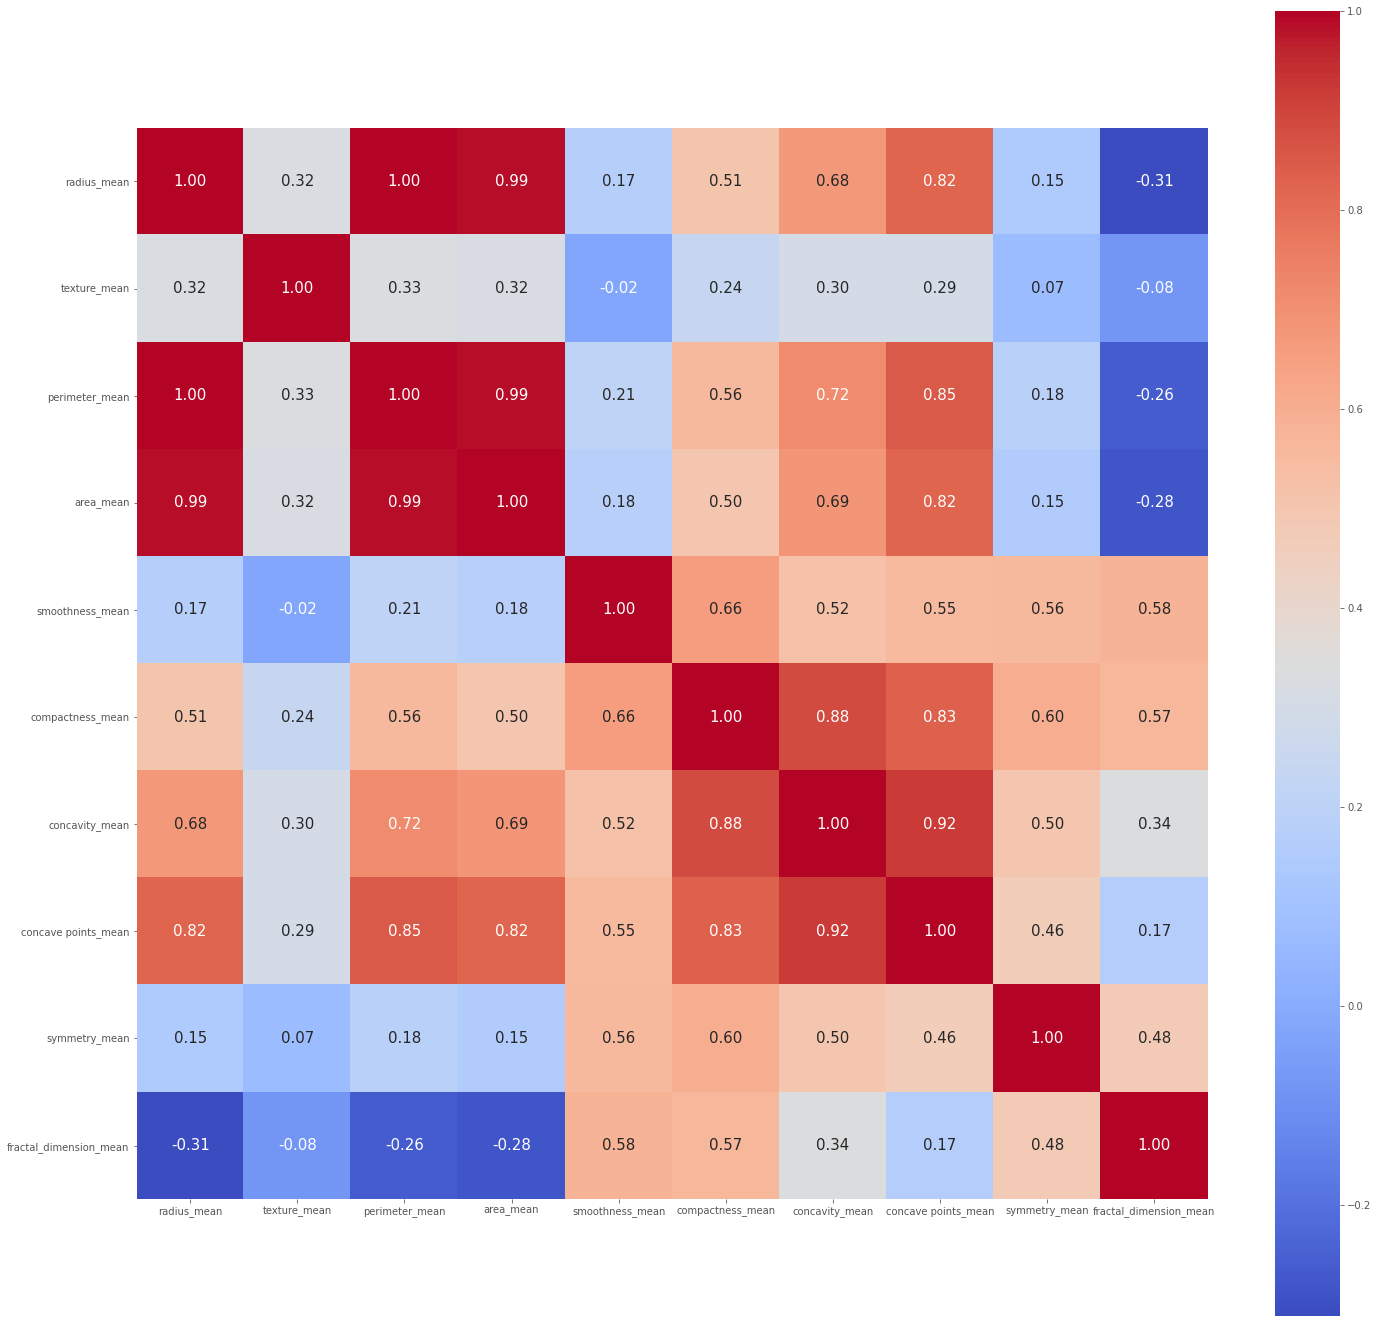

In [12]:
corr = data[mean_columns].corr() # .corr is used for find corelation
plt.figure(figsize=(24,24))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= mean_columns, yticklabels= mean_columns,
           cmap= 'coolwarm')

# As we can see,
Mean_radius has strong positive correlation with Perimeter_mean (1.0),area_mean(0.99), concave point mean(0.82) and concavity mean(0.68)

# The most important is diagnosis, which have negative correlation with
radius_mean(-0.73), perimeter_mean(-0.74),area_mean(-0.71), concave point mean(-0.78), concavity mean(-0.7) and compactness mean(-0.6)

# Target Value(Y)= Diagnosis

# Independent Variable (X)= 
(perimeter_mean, area_mean, concave point mean, concavity mean and compactness mean)

# Remember:
Diagnosis is categorical with two values 1(benign) and 0(Malignant)

# which means:
The Diagnosis is more likely to be Benign (1) if the independent variable is low...
Also the Diagnosis is likely to be Malignant (0) if the independent variable is high.

# Therefore:
Diagnosis is negatively correlated with independent variable

# Feature Selection


In [13]:
y= data['diagnosis']
x= data[['perimeter_mean','area_mean', 'concave points_mean','concavity_mean','compactness_mean']]

# Split data into two,
one for training our model,the other for testing our model, using train_test_split.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# Use models
First one is Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression as lr
reg_model=lr()
reg_model.fit(X_train,Y_train)
print('intercept is', reg_model.intercept_.round(2))
print('coefficient is', reg_model.coef_.round(2))

intercept is [30.3]
coefficient is [[-0.46  0.02 -0.53 -1.17 -0.68]]


To test the model, I used it  predict the X_test

In [16]:
y_pred=reg_model.predict(X_test)
print(reg_model.predict(X_test))
y_pred=reg_model.predict(X_test)

[0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


To check evaluate the accuracy of the model

In [17]:
print(reg_model.score(X_test,Y_test))

reg_acc=reg_model.score(X_test,Y_test)

0.8654970760233918


# Logistics regression has 0.86 i.e 86% accuracy rate.

Second one is KNN (K nearest neighbor)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train,Y_train)
y_pred1=knn.predict(X_test)
print(y_pred1)


[1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


To Check for Knn accuracy


In [19]:
y_d=np.reshape(X_test,(171,5))
print(y_d.shape)
knn_acc=knn.score(X_test,Y_test)
print(knn.score(X_test,Y_test))

(171, 5)
0.847953216374269


# Knn has 0.85 (86%) accuracy

The third one is Randomforest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)
y_pred2=rf_model.predict(X_test)
print(y_pred2)




[0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


In [21]:
print(rf_model.score(X_test,Y_test))

rf_acc=rf_model.score(X_test,Y_test)


0.9005847953216374


# Randomforest has accuracy of 0.91(91%)

The last one is Support Vector Machine(SVM)


In [22]:
from sklearn import svm
sv_model=svm.SVC()
sv_model.fit(X_train, Y_train)
y_pred3=sv_model.predict(X_test)
print (y_pred3)
print('Accuracy is', sv_model.score(X_test,Y_test))
sv_acc=sv_model.score(X_test, Y_test)

[1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy is 0.8888888888888888


# SVM has accuracy of 88%

The next thing is to plot a barplot to visualize the best model

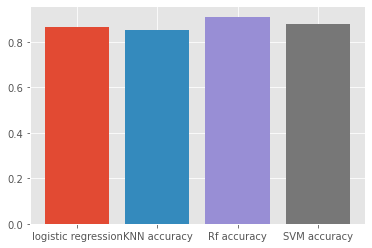

In [27]:
reg_acc1=0.866
knn_acc1=0.85
rf_acc1=0.91
sv_acc1=0.88
model=reg_acc1,knn_acc1,rf_acc1,sv_acc1
plt.bar(height=reg_acc1,x='logistic regression')
plt.bar(height=knn_acc1,x='KNN accuracy')
plt.bar(height=rf_acc1,x='Rf accuracy')
plt.bar(height=sv_acc1,x='SVM accuracy')
plt.show()

# As seen , Random forest has the highest model accuracy... Therefore, it's the best model to be adopted for this classification